In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('winequality-red.csv')

## Display Dataset and Info

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Visualization

In [6]:
columns=df.columns

In [7]:
columns=df.columns[:-1]# get x

In [15]:
columns=columns.tolist()

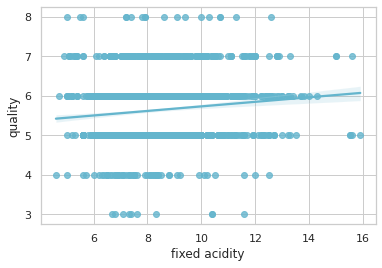

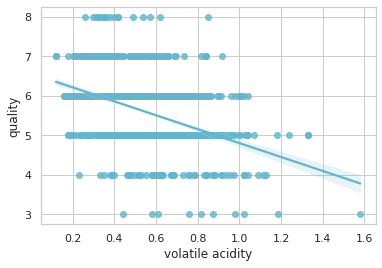

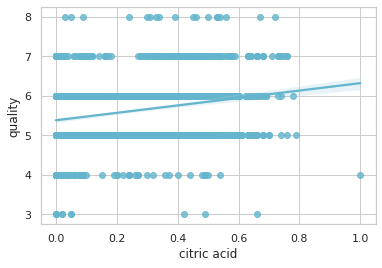

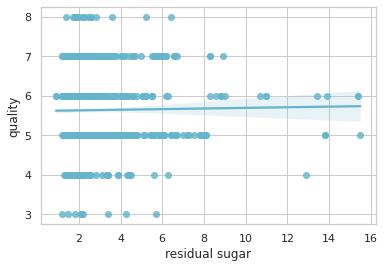

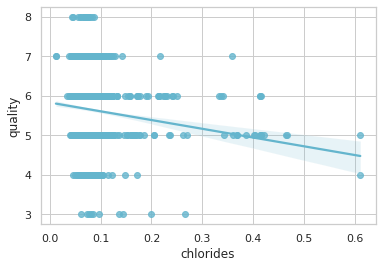

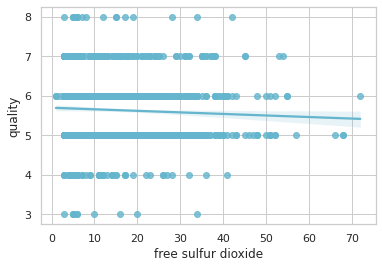

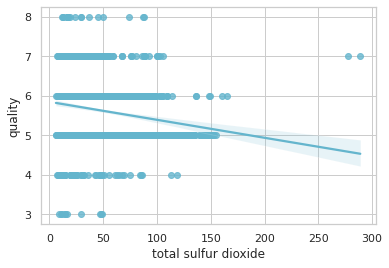

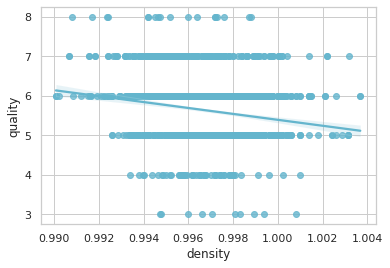

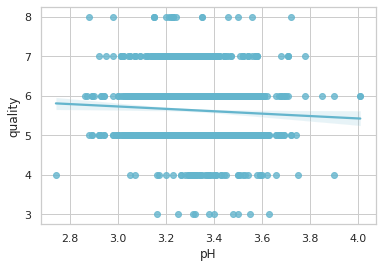

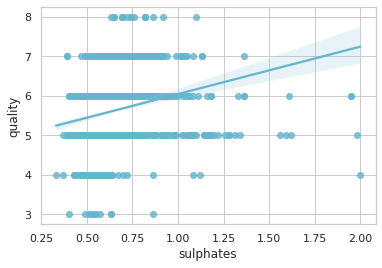

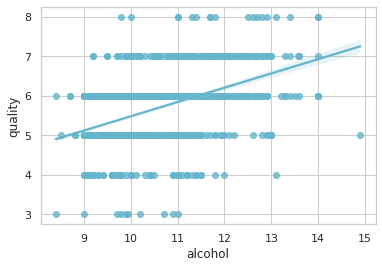

In [17]:
#regression plots
for i in columns:
    sns.set_theme(style="whitegrid")
    sns.regplot(x=i,data=df,y="quality",color='c')
    plt.show()

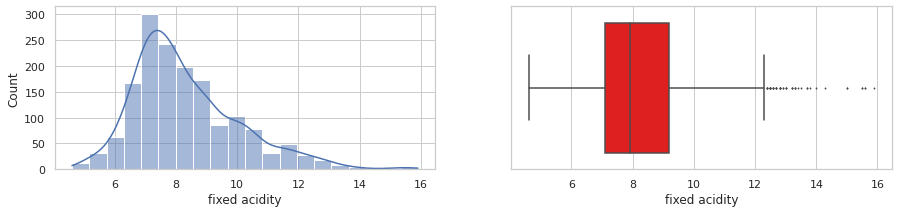

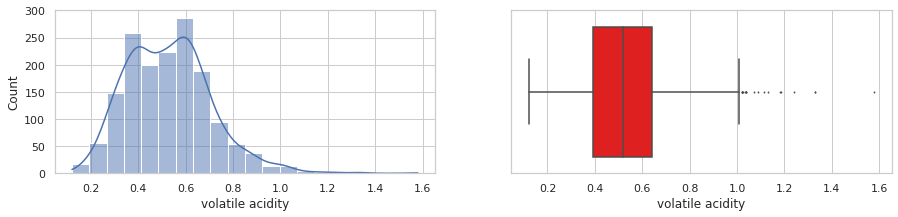

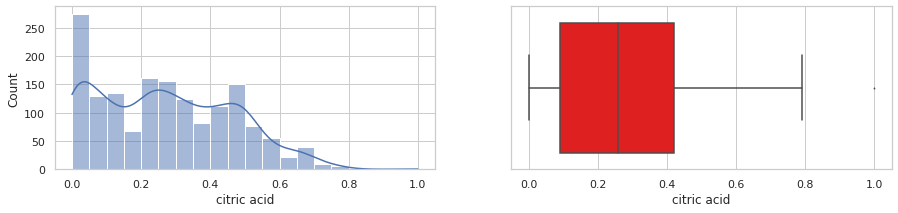

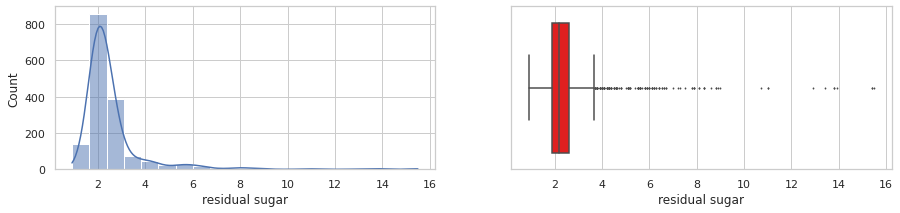

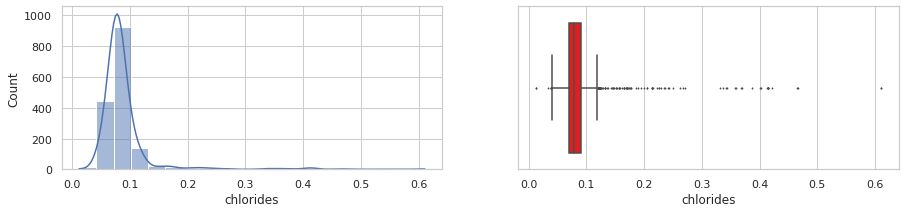

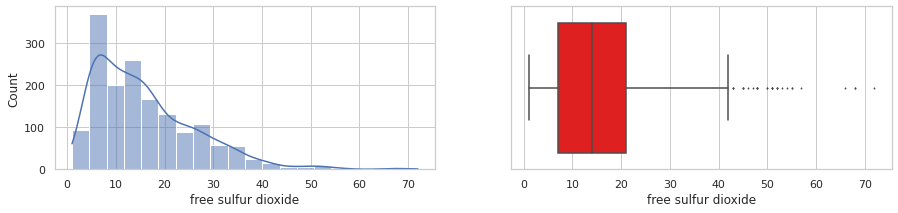

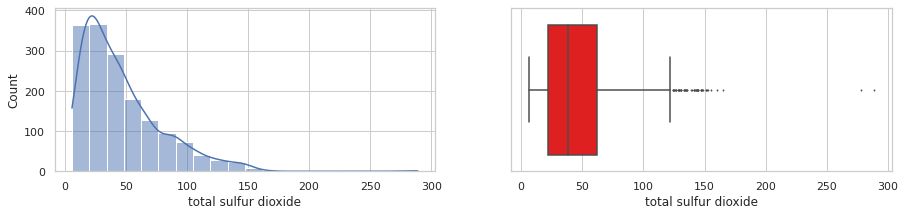

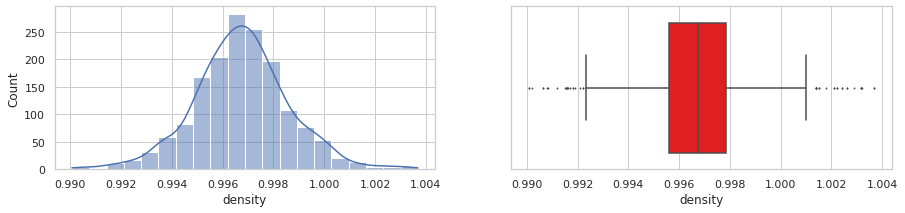

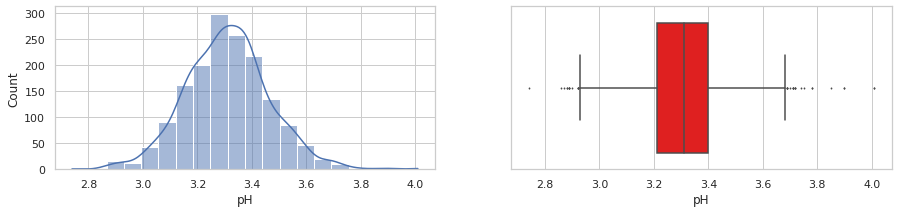

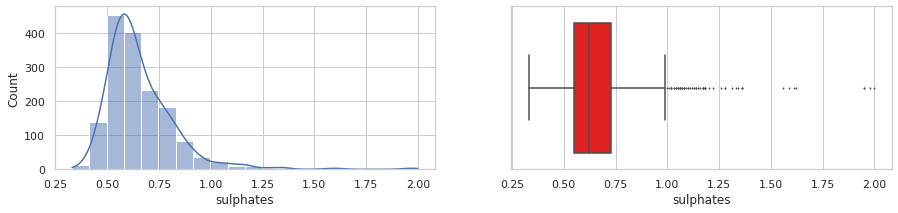

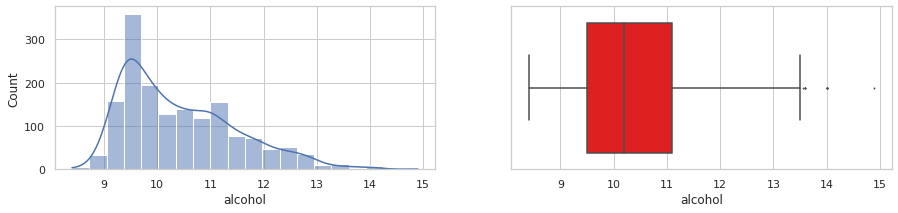

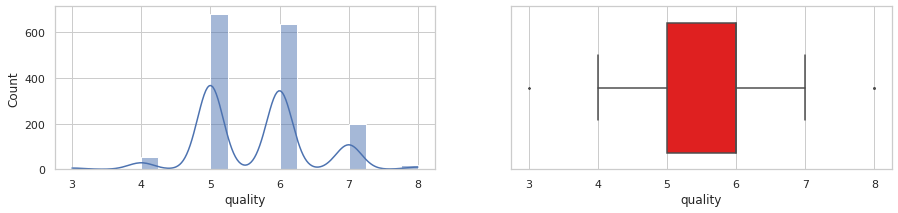

In [111]:
for i in df:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(x=df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(x=df[i], ax = axs[1], color='red', fliersize=1)# show plots for visualization to gain information 

In [28]:
# We can use heatmap to check for multicolinearity where features have relation between them and it causes hard matrices

<AxesSubplot:>

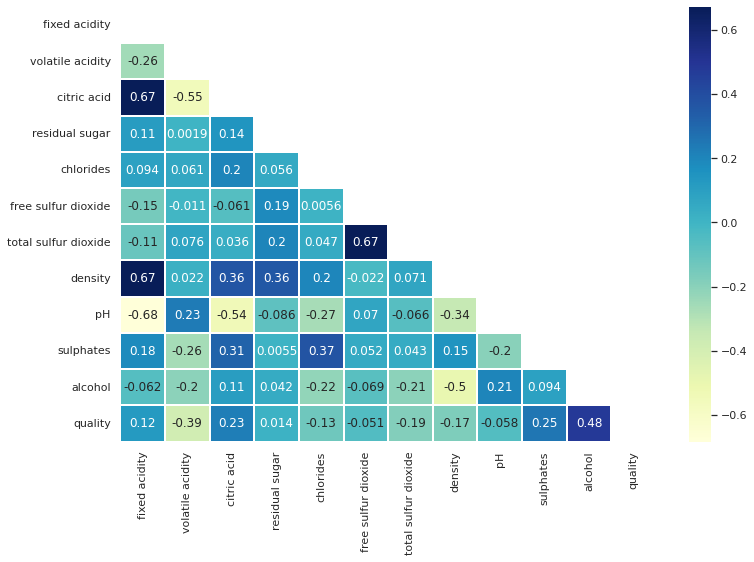

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", mask=mask, linewidth=0.3)

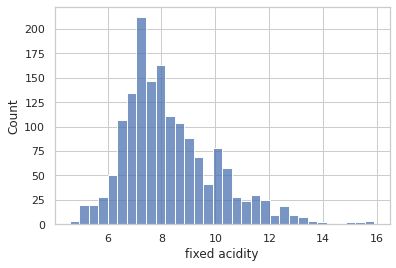

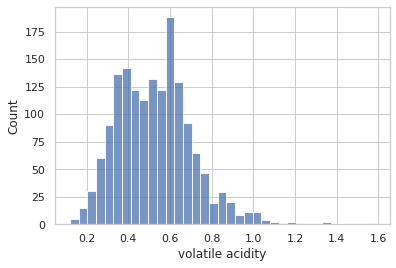

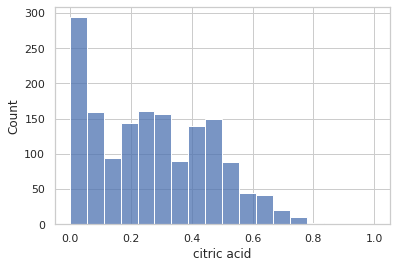

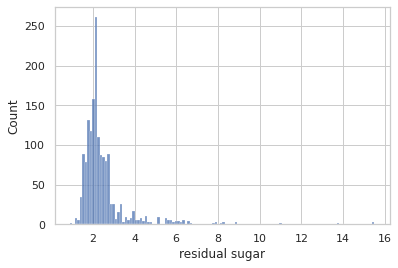

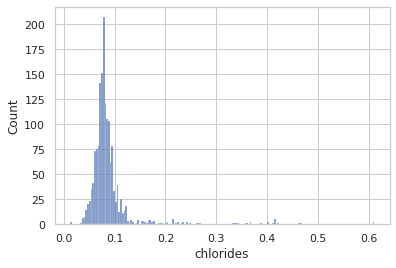

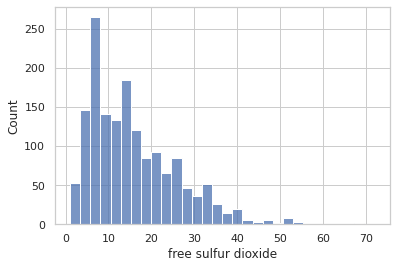

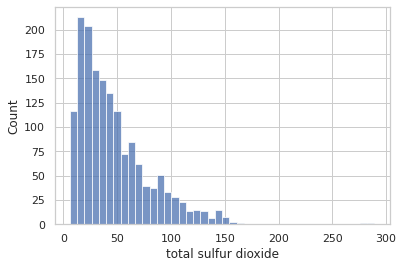

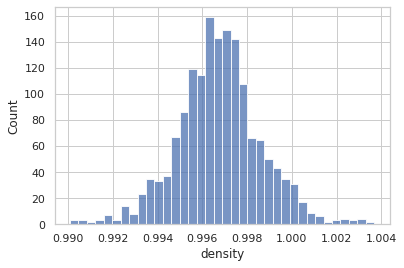

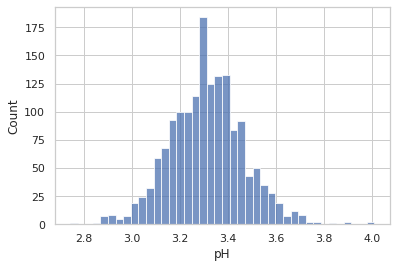

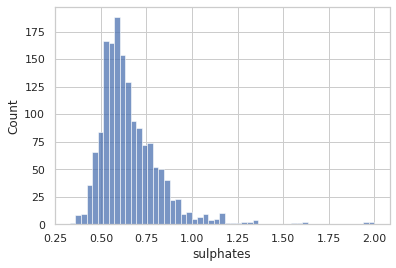

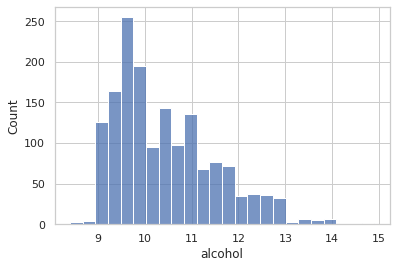

In [30]:
#histograms for each type
for i in columns:
    sns.histplot(x=i,data=df)
    plt.show()

## Data Preprocessing

In [34]:
# Before preprocessing data we need to split data into train and test sets
from sklearn.model_selection import train_test_split
x = df.drop(['quality'], axis = 1)
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [72]:
# We apply standard scaler on the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
y_test=y_test.values

In [74]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
y_scaler=StandardScaler()
y_train=y_scaler.fit_transform(y_train.reshape(-1,1))
y_train=y_train.reshape(len(y_train),)

In [75]:
y_test=y_scaler.transform(y_test.reshape(-1,1))
y_test=y_test.reshape(len(y_test),)

## We shall try some regression techniques

In [76]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Training score: ",lr.score(x_train,y_train))
# Model performs poorly on training set as well which we shall see why

Training score:  0.3655849921479044


## The dependent variable is taking discrete values- Let us see it as a classification problem

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [113]:
x = df.drop(['quality'], axis = 1)
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
scalar = StandardScaler()
x_train=x_train.values
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
#Using logistic Regression
logreg = LogisticRegression(random_state = 0,solver='liblinear')
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred= logreg.predict(x_test)

In [115]:
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

Model accuracy score: 59.69%


In [116]:
# Using random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [117]:
model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred_forest=model.predict(x_test)

In [119]:
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_forest) * 100, 2)}%')

Model accuracy score: 70.94%


In [120]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [121]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_neigh=neigh.predict(x_test)

In [123]:
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_neigh) * 100, 2)}%')

Model accuracy score: 50.94%


## Let us apply PCA
There are some redundant features in data which can be handled using PCA. We reduce the dimensions of data.

In [141]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [142]:
from sklearn.decomposition import PCA

In [143]:
pca = PCA(n_components=.90)

In [144]:
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
x = df_pca

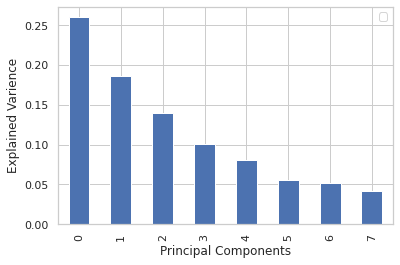

In [145]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [158]:
from sklearn.linear_model import LogisticRegression
#Back to Logistic Regression on data processed with PCA and Scaling
logreg = LogisticRegression(solver='liblinear')    
logreg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [159]:
y_pred_log_reg_pca=logreg.predict(x_test)

In [149]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_log_reg_pca))

Accuracy Score:  0.928125


## Data Visualization

In [150]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred_log_reg_pca)

<AxesSubplot:>

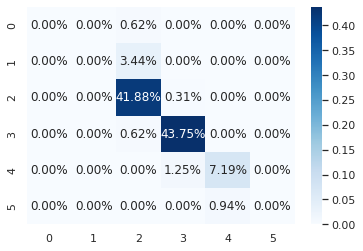

In [151]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [152]:
# Using KNN
neigh = KNeighborsClassifier(n_neighbors=3)

In [153]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [154]:
y_pred_log_reg_pca=neigh.predict(x_test)

In [155]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_log_reg_pca))

Accuracy Score:  0.928125


In [156]:
cf_matrix = confusion_matrix(y_test,y_pred_log_reg_pca)

## Showing Confusion Matrix

<AxesSubplot:>

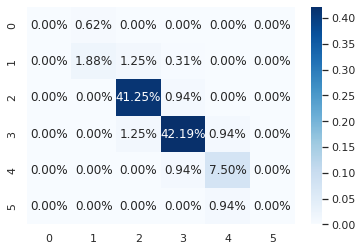

In [157]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

## Approach
I first cleaned the data and visualized it. Then I tried to apply regression techniques not it. However since there were discrete number of target outputs none did work well. I got poor scores. Then I moved to a classification approach. The numbers looked promising. However, there were redundan features that lowered the accuracy score which I reduced using PCA. With PCA I achieved an accuracy of 92% for Logistic REgression and KNN algorithms. The accuracy scores were calculated and the confusion matrix is visually shown.